# Cats vs Dogs

### In this part of the project, we will use a couple of methods:
    
#####       - Data importation
#####       - Visualization for deeper understaing of the data 
#####       - PCA for compression
#####       - Models and the use of accuracy score for Classification of the data
#####       - Testing the chosen model

### First, we will import the necessary libraries:

In [14]:
import numpy as np
import pandas as pd

# metrics and score
from sklearn.metrics import accuracy_score

# learning algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier

# spliting and evaluation methods
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, RandomizedSearchCV, cross_val_predict

# Dimensionality Reduction
from sklearn.decomposition import PCA

# plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
from termcolor import colored
import seaborn as sns

# Image proccessing libraries
import os
from skimage import color
import cv2
from PIL import Image, ImageOps
import random

# warning alerts ignoring
import warnings
warnings.filterwarnings('ignore')

### Importing the data

In [60]:
url= r'C:\Users\Morian Hamami\Downloads\dogs-vs-cats\train\train'
images=os.listdir(url)

x_values=[]
y_values=[]

for i in images:
    
    y_value=i.split('.')[0]
    y_values.append(y_value)
    file=os.path.join(url,i)
    image=Image.open(file)
    
    #Resizing the images
    resized_img=image.resize((40, 40))
    
    #changing the images to black & white 
    b_w_img=resized_img.convert(mode='L')
    x_values.append((list(b_w_img.getdata())))

While importing the data, we made sure to resize the images to 40x40 in order to make all the images the same size.

In addition, we made sure to change all the images to black and white in order to reduce the dimensions of each image.

By reducing dimensions, and normalizing the data by making sure all images are the same size, we are making sure that we won't get models that overfit when classifying the images to cats and dogs. Reducing dimensions also helps our code run faster.

In [75]:
# Converting the data into a dataframe
col=['{number}'.format(number=i) for i in range(0,40*40)]
D = pd.DataFrame(data=x_values, columns=col)
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 1600 entries, 0 to 1599
dtypes: int64(1600)
memory usage: 305.2 MB


### Splitting the data into train and test

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(x_values, y_values, test_size=0.2, random_state=42)

In [97]:
y_train= pd.DataFrame(Y_train)
y_test= pd.DataFrame(Y_test)
x_test = pd.DataFrame(X_test)

x_train= pd.DataFrame(X_train)
print("X_train shape is", x_train.shape)
x_train

X_train shape is (20000, 1600)


,0,1,2,3,4,5,6,7,8,9,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,17,19,44,52,53,58,61,64,69,71,...,77,64,76,63,59,62,76,83,89,90
1,194,186,191,198,198,199,225,212,228,213,...,185,188,180,177,175,175,180,184,183,183
2,19,59,40,23,27,28,28,30,31,33,...,103,126,108,101,108,93,88,83,90,94
3,100,116,124,118,119,129,134,142,146,151,...,133,132,123,111,116,113,111,103,101,99
4,178,150,176,117,192,126,204,211,211,167,...,32,31,31,30,30,25,23,21,15,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,213,215,216,220,221,218,218,223,211,192,...,66,65,83,93,70,45,32,28,33,47
19996,243,252,252,250,255,252,252,245,240,244,...,215,211,217,217,208,204,208,213,215,215
19997,67,68,75,77,73,75,79,82,84,82,...,52,54,51,49,40,36,38,38,39,37
19998,119,119,106,100,122,147,146,205,234,246,...,177,140,181,171,164,185,139,142,138,170


We can see that X_train includes Integers that represent each pixels gray scale.
X_train includes 20,000 images the size of 40X40

In [152]:
print(y_train.value_counts())

dog    10015
cat     9985
dtype: int64


We can see that the data is quite balanced. There is a differnce of 30 images between the categories that doesn't require meddling with.

### Visualizing the data

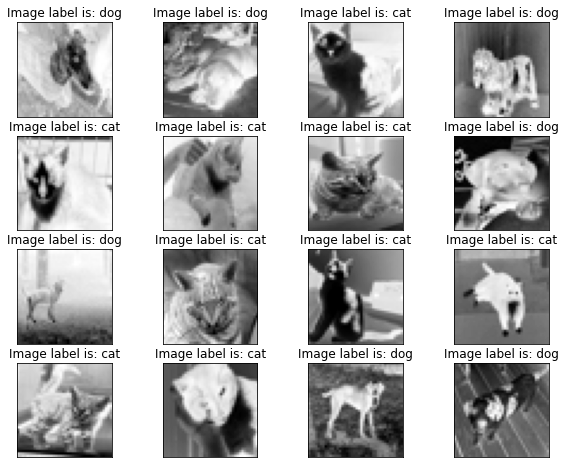

In [78]:
plt.figure(figsize=(10,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train.to_numpy()[i].reshape(40, 40), cmap = plt.cm.binary)
    plt.title("Image label is: {}".format(Y_train[i]))
plt.show()

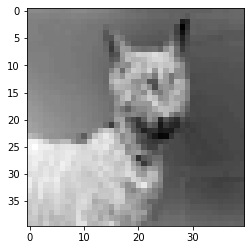

In [81]:
plt.imshow(x_train.to_numpy()[30].reshape(40, 40), cmap = plt.cm.binary)

Here we can see that even after reshaping, we can still recognize if the animal in the picture is a cat or a dog.

This is important because the models will be able to classify the pictures accordingly.

### Dimensionality Reduction using PCA

We need dimensionality reduction so the training set won't take up much space and slow down the classification algorithms>

In order to choose the right number of dimensions to reduce down to, we will require a preservation of 95% of the variance.

Variance refers to the spread of the data set.

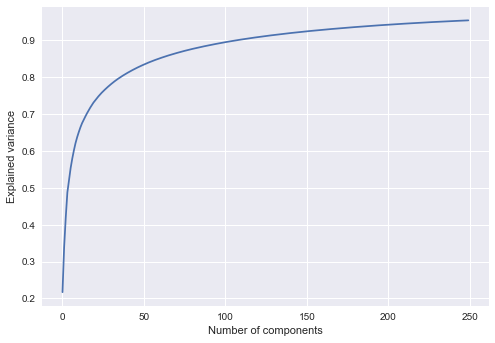

In [108]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Explained variance")
plt.savefig('elbow_plot.png', dpi = 100)

In [94]:
pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
this = np.argmax(cumsum >= 0.95) + 1
print("Number of features required for preservation of 95% of the variance is ", this)

Number of features required for preservation of 95% of the variance is  250


Now, we will implement the PCA and then decompress the reduced dataset back to 784 dimensions, using inverse transformation of the PCA projection

In [102]:
pca = PCA(n_components = 250)
X_reduced = pca.fit_transform(x_train)
X_recovered = pca.inverse_transform(X_reduced)
X_recovered.shape

(20000, 1600)

In [103]:
X_test_reduced = pca.fit_transform(x_test)
X_test_recovered = pca.inverse_transform(X_test_reduced)
X_test_recovered.shape

(5000, 1600)

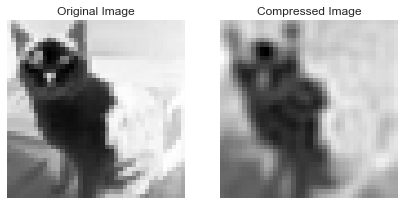

In [117]:
#Visualizing the outcome

#Plotting the original image
plt.figure(figsize=(7,7))
plt.subplot(1,2, 1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Original Image')
plt.imshow(x_train.to_numpy()[2].reshape(40, 40), cmap="binary")
#Plotting the compressed image
plt.subplot(1,2, 2)
plt.xticks([])
plt.yticks([])
plt.title('Compressed Image')
plt.imshow(X_recovered[2].reshape(40, 40), cmap="binary")

We can see that the projection lost some information, but it is quite close to the original data, and the image is still recognizable, but might be too vague for the models to get a high score.

### The Models

Our scoring method is the Accuracy Classification Score. Accuracy counts the number of data points in the test set that have been predicted correctly, and returns that number as a fraction of the test set size.

#### KNN Classification

The KNN algorithm assumes that similar things exist close to one another.

In [132]:
knn = KNeighborsClassifier()
knn.fit(X_recovered, y_train)
y_train_predict = knn.predict(X_recovered)

print("KNN Accuracy: ", accuracy_score(y_train, y_train_predict))

KNN Accuracy:  0.7416


#### Naive Bayes Classification

Naive Bayes is a classification technique based on Bayes' Theorem with an assumption of independence amongst predictors.

In [128]:
gnb = GaussianNB()
gnb.fit(X_recovered, y_train)
y_train_predict = gnb.predict(X_recovered)

print("Naive Bayes Accuracy: ", accuracy_score(y_train, y_train_predict))

Naive Bayes Accuracy:  0.5856


#### Bagging Classification

Bagging Classification is the ensemble learning method that is commonly used to reduce variance within a noisy dataset. In bagging, a random sample of data in a training set is selected with replacement—meaning that the individual data points can be chosen more than once.

In [129]:
bag=BaggingClassifier(DecisionTreeClassifier(), n_estimators=200, max_samples=50)
bag.fit(X_recovered, y_train)
y_train_predict = bag.predict(X_recovered)

print("Bagging Accuracy: ", accuracy_score(y_train, y_train_predict))

Bagging Accuracy:  0.59485


#### Gradient Boost Classification

Gradient Boost is a type of machine learning boosting. It relies on the intuition that the best possible next model, when combined with previous models, minimizes the overall prediction error. The key idea is to set the target outcomes for this next model in order to minimize the error

In [142]:
gbc=GradientBoostingClassifier(max_depth=2, n_estimators=10)
gbc.fit(X_recovered, y_train)
y_train_predict = gbc.predict(X_recovered)

print("Gradient Boosting Classifier Accuracy: ", accuracy_score(y_train, y_train_predict))

Gradient Boosting Classifier Accuracy:  0.60835


### Testing the chosen model

The accuracy score of the KNN Classifier was the highest out of the four models. Therefore, we chose to test this model.

In [139]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_recovered, y_train)
y_test_predict = knn.predict(X_test_recovered)

print("KNN Accuracy: ", accuracy_score(y_test, y_test_predict))

KNN Accuracy:  0.6188


We got approximately 62% accuracy in the test. We were not expecting a high score because we didn't use Nueral Networks for this classification. 